In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [91]:
!pip install openpyxl

In [2]:
# reading the dataset

df = pd.read_csv("avocado.csv")


In [3]:
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [4]:
# df shows the dataset which contains 18249 rows and 14 columns
# The main important thing here is that our target column is AveragePrice. 
# So we are building the model to predict the Average Price of an Avacado based on the other column infos 
# and here the target column "AveragePrice" has continuous values and hence its a regression problem. 
# We need to choose the regression models to solve this problem

# Exploratory Data Analysis (EDA)

In [5]:
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [6]:
# df.head() displays the first 5 row values(indexed from 0-4) from the dataset

In [7]:
# Below is what each column heading means with respect to an Avacado

In [8]:
df.tail()

Unnamed: 0        Date  AveragePrice  Total Volume     4046     4225  \
18244           7  2018-02-04          1.63      17074.83  2046.96  1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70  3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92  2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63  2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77  2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    0.00    13498.67    13066.82      431.85          0.0  organic  2018   
18245    0.00     9264.84     8940.04      324.80          0.0  organic  2018   
18246  727.94     9394.11     9351.80       42.31          0.0  organic  2018   
18247  727.01    10969.54    10919.54       50.00          0.0  organic  2018   
18248  224.53    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

In [9]:
 # df.tail() displays the last 5 rows from the dataset(indexed from 18244-18248), so from here we can draw conclusion that we have 18249 rows in total(0-18248)

In [10]:
df.shape

(18249, 14)

18249 rows, 14 columns

In [11]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

df.columns displays the list of all column headings in our dataset
We have 14 columns in our dataset and their meanings wrt to Avacado is as below

1.Date - The date of the observation
2.AveragePrice - the average price of a single avocado
3.type - conventional or organic
4.year - the year
5.Region - the city or region of the observation
6.Total Volume - Total number of avocados sold
7.4046 - Total number of avocados with PLU 4046 sold
8.4225 - Total number of avocados with PLU 4225 sold
9.4770 - Total number of avocados with PLU 4770 sold



In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [13]:
# from df.info() we can infer that we have 18249 row entries in total(0-18248)
# we have 14 data columns(0-13)
# All 14 data column contains has no null values, hence the non-null count is 18249 for all these 14 columns of dataset
# Most of the columns have either float or int as the values and hence the datatype
# The column "Date", "type" and "region" is not identifiable hence seen as object
# We need to convert them into python identifiable type
# The column "type" and "region" has string values and needs to encoded to convert them to numeric(these are categorical too)
# Date is not identified , so we need to split and extract data from it and change its datatype to identifiable type

In [14]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are no null values

In [15]:
# Trying to find the duplicate rows in our dataset

duplicate=df.duplicated()
print(duplicate.sum())      # gives no. of duplicate rows in the training dataset
df[duplicate]               # prints the duplicate rows in the training dataset

0


Empty DataFrame
Columns: [Unnamed: 0, Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: []

In [16]:
# No duplicates present in our dataset

In [17]:
df.describe()

Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   17692.894652   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02       0.000000   
50%    1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03       0.000000   
75%    6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04     132.500000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               year  
count  18249.000000  
mean    2016.147899  
std        0.939938  
min     2015.000000  
25%     2015.000000  
50%     2016.000000  
75%     2017.000000  
max     2018.000000

In [18]:
# df.describe() shows statistical data 
# It show that there are multiple outliers mostly in XLargeBags 
# There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction
# Also, number of rows in each column are same, means there are no null values in the data set.
# Also, the mean and 50% value of most of the column are same and the STD and mean are very close to each other.
# Most of the column statistics data are near to 0 values.
# We need to treat the outliers present
# We can see that from above observation, some of the variables are widely distributed like total bags,Xlarge bags and
# some are narrowly distributed like avg price, year.
# So scaling is required for this dataset

# Uni-Variant Anaysis

In [19]:
# Let's analyze the categorical columns

In [20]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [21]:
# We have 2 cateogories in types
# 1) Conventional
# 2) Organic

In [22]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [23]:
# Both categories are almost equal in number

<AxesSubplot:xlabel='type', ylabel='count'>

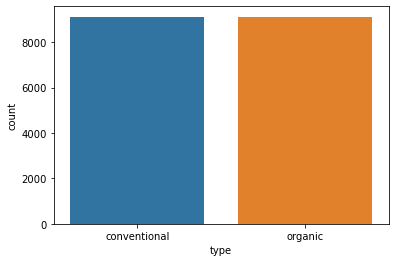

In [24]:
sns.countplot(df['type'])

In [25]:
# Both categories of Avacado types are almost equal in number

We can see that number of conventional and oraganic avocados are almost equal.

conventional=9126 organic=9123



In [26]:
df['year'].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [27]:
# We have 4 years of data 2015, 2016, 2017 and 2018 in which avacados are sold

In [28]:
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [29]:
# High no. of Avacados avacados are in the year 2017
# Year 2016 and 2015 shows almost equal observations of Avacados
# Year 2018 has least observations of Avacados

<AxesSubplot:xlabel='year', ylabel='count'>

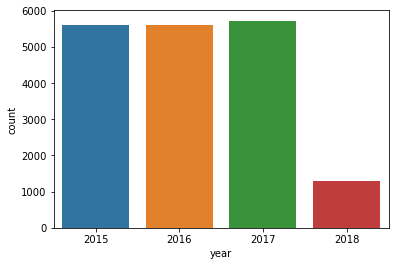

In [30]:
sns.countplot(df['year'])

In [31]:
# This shows the graphical representation of the above analysis
# 2015, 2016 and 2017 years have almost same observations of Avacados
# there is very less observations in the year 2018.

In [32]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [33]:
# Shows different regions of observations

<AxesSubplot:xlabel='region', ylabel='count'>

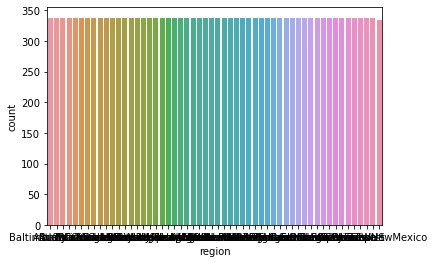

In [34]:
sns.countplot(df['region'])

In [35]:
regions = df.groupby(df.region)
print("Total regions :", len(regions))
print("-------------")
for name, group in regions:
    print(name, " : ", len(group))

Total regions : 54
-------------
Albany  :  338
Atlanta  :  338
BaltimoreWashington  :  338
Boise  :  338
Boston  :  338
BuffaloRochester  :  338
California  :  338
Charlotte  :  338
Chicago  :  338
CincinnatiDayton  :  338
Columbus  :  338
DallasFtWorth  :  338
Denver  :  338
Detroit  :  338
GrandRapids  :  338
GreatLakes  :  338
HarrisburgScranton  :  338
HartfordSpringfield  :  338
Houston  :  338
Indianapolis  :  338
Jacksonville  :  338
LasVegas  :  338
LosAngeles  :  338
Louisville  :  338
MiamiFtLauderdale  :  338
Midsouth  :  338
Nashville  :  338
NewOrleansMobile  :  338
NewYork  :  338
Northeast  :  338
NorthernNewEngland  :  338
Orlando  :  338
Philadelphia  :  338
PhoenixTucson  :  338
Pittsburgh  :  338
Plains  :  338
Portland  :  338
RaleighGreensboro  :  338
RichmondNorfolk  :  338
Roanoke  :  338
Sacramento  :  338
SanDiego  :  338
SanFrancisco  :  338
Seattle  :  338
SouthCarolina  :  338
SouthCentral  :  338
Southeast  :  338
Spokane  :  338
StLouis  :  338
Syracuse  

Each one of the regions has exactly 338 entries except for WestTexNewMexico.

In [36]:
# Let's analyze our target column

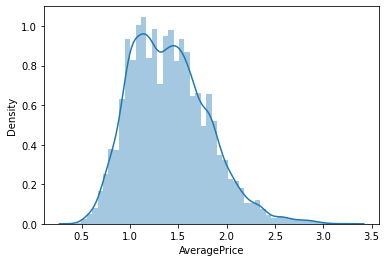

In [37]:
sns.distplot(df['AveragePrice']);

We can see that average price is slightly skewed to the right

# Feature Engineering

In [38]:
# The column "Unnamed:0" is just kind of id which have no effect on the dataset
# So let's drop it

In [39]:
df=df.drop(['Unnamed: 0'], axis=1)
df

Date  AveragePrice  Total Volume     4046       4225    4770  \
0      2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1      2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2      2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3      2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4      2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244  2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
18245  2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246  2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247  2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248  2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         8696.87     8603.62       93.25          0.0  conventional  2015   
1         9505.56     9408.07       97.49          0.0  conventional  2015   
2         8145.35     8042.21      103.14          0.0  conventional  2015   
3         5811.16     5677.40      133.76          0.0  conventional  2015   
4         6183.95     5986.26      197.69          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18244    13498.67    13066.82      431.85          0.0       organic  2018   
18245     9264.84     8940.04      324.80          0.0       organic  2018   
18246     9394.11     9351.80       42.31          0.0       organic  2018   
18247    10969.54    10919.54       50.00          0.0       organic  2018   
18248    12014.15    11988.14       26.01          0.0       organic  2018   

                 region  
0                Albany  
1                Albany  
2                Albany  
3                Albany  
4                Albany  
...                 ...  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico  

[18249 rows x 13 columns]

In [40]:
# The columns "Unnamed:0" is dropped successfully

Converting Date column of our DataFrame to pandas readable type.

In [41]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].apply(lambda x:x.month)
df['Day'] = df['Date'].apply(lambda x:x.day)


In [42]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0     8696.87     8603.62       93.25          0.0  conventional  2015   
1     9505.56     9408.07       97.49          0.0  conventional  2015   
2     8145.35     8042.21      103.14          0.0  conventional  2015   
3     5811.16     5677.40      133.76          0.0  conventional  2015   
4     6183.95     5986.26      197.69          0.0  conventional  2015   

   region  Month  Day  
0  Albany     12   27  
1  Albany     12   20  
2  Albany     12   13  
3  Albany     12    6  
4  Albany     11   29

Here we add two more columns month and day where 12 in Month implies the month "December" & 27 in Day implies the 27th day of a month.

In [43]:
# Now we can drop the column date
df.drop(['Date'],axis=1,inplace = True)

In [44]:
df.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  region  Month  Day  
0     8603.62       93.25          0.0  conventional  2015  Albany     12   27  
1     9408.07       97.49          0.0  conventional  2015  Albany     12   20  
2     8042.21      103.14          0.0  conventional  2015  Albany     12   13  
3     5677.40      133.76          0.0  conventional  2015  Albany     12    6  
4     5986.26      197.69          0.0  conventional  2015  Albany     11   29

In [45]:
# The column Date is successfully dropped

# Bi-Variant Analysis

Text(0.5, 1.0, 'Average Price Per Month')

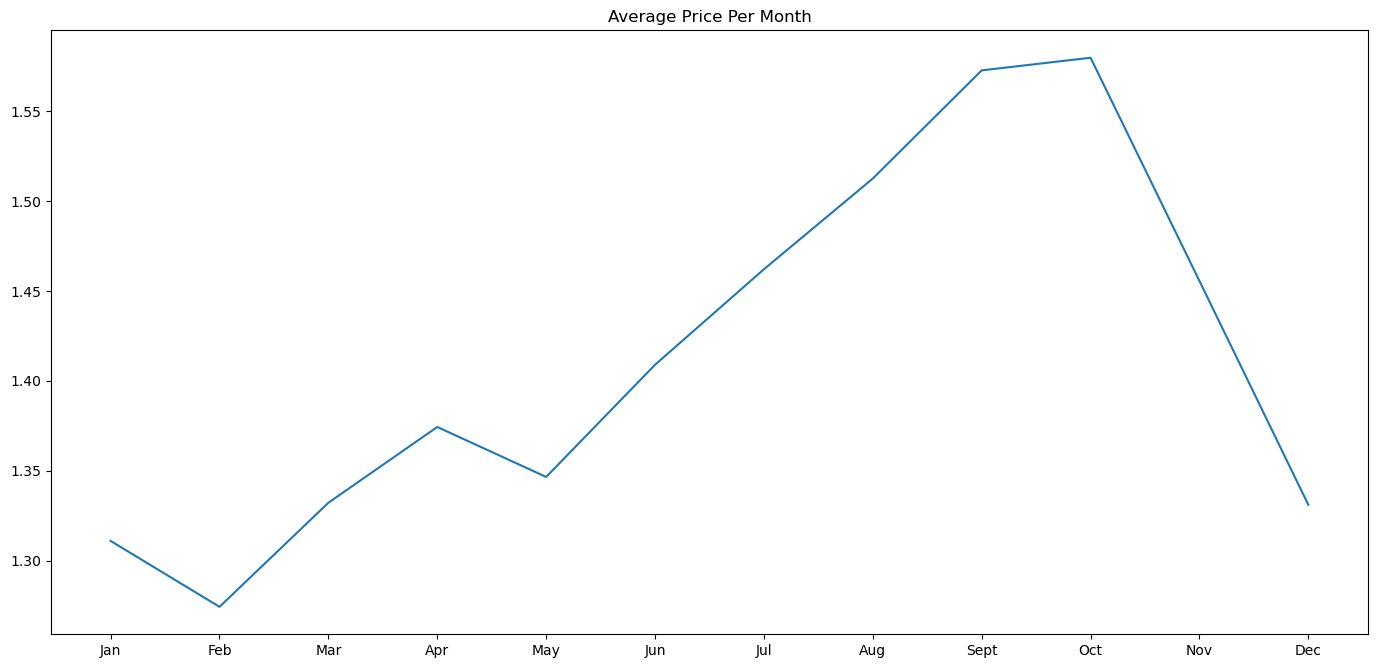

In [46]:
byMonth = df.groupby("Month").mean()
plt.figure(figsize=(17,8),dpi=100)
plt.plot(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"],byMonth['AveragePrice'])
plt.title('Average Price Per Month')

The analysis from here is that, the above graph plotted for average price of avocado per month we can observe that the price rises for a while in February to March and to April then it falls in April and then the month of May witnesses a rise in the average price. This rise reaches its zenith in the month of October and henceforth it starts to fall.

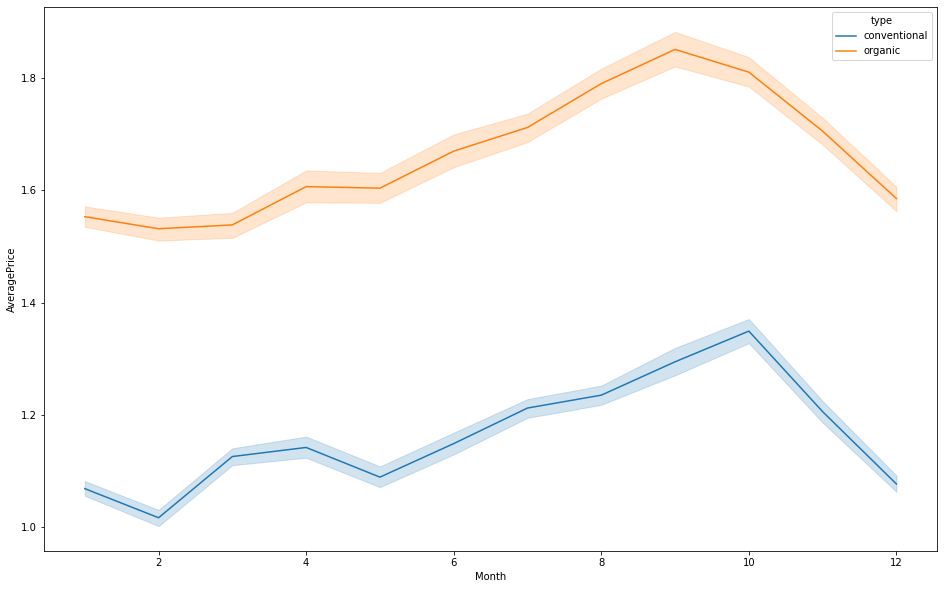

In [47]:
plt.figure(figsize=(16,10))
sns.lineplot(x = "Month", y = "AveragePrice",hue = 'type', data = df)
plt.show()

0 - conventional
1 - organic

There is hike between month 8–10 of both type of avocado both for conventional and organic type of avocado.

Also, the conventional type of avocado is varying in term of price as seen in line plot because in starting the price is high but then it get decreased and so on.

And has increasing range of price

Text(0.5, 1.0, 'Average Price Per Day')

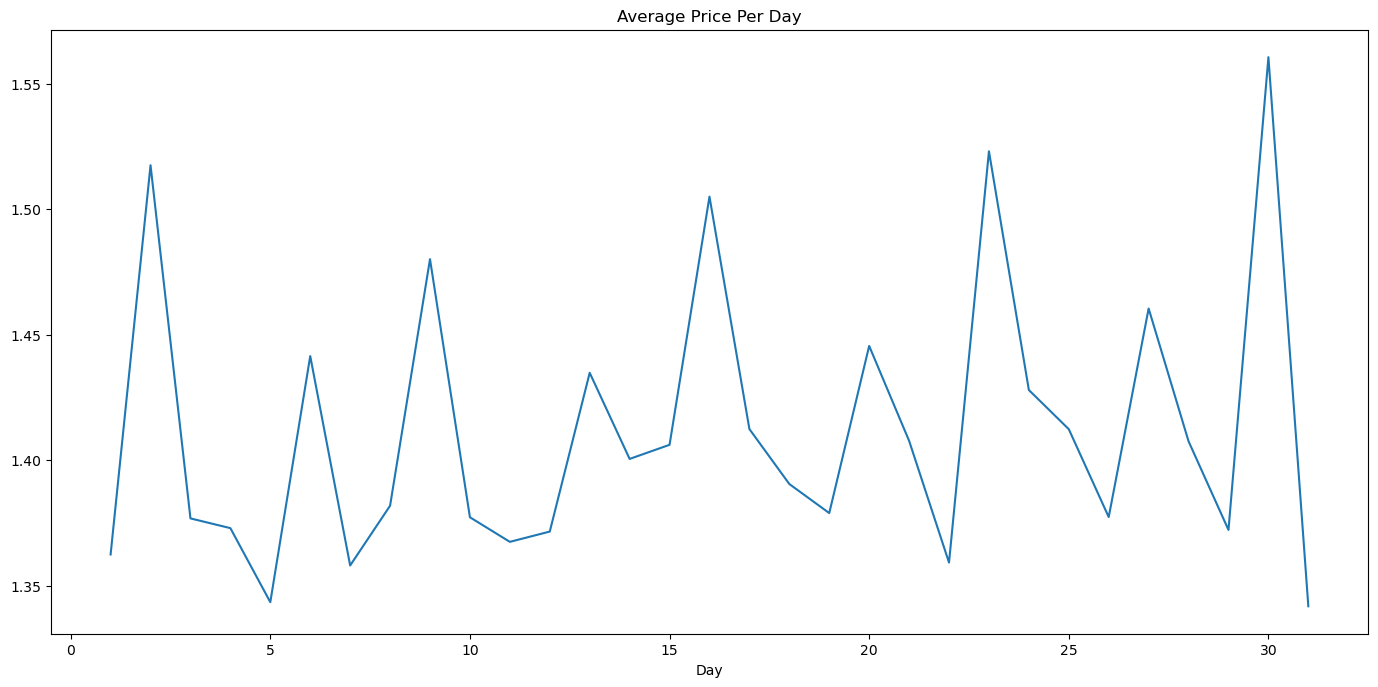

In [48]:
byDay = df.groupby("Day").mean()
plt.figure(figsize=(17,8),dpi=100)
byDay['AveragePrice'].plot()
plt.title('Average Price Per Day')

The above graph for average price per day implies that the price fluctuates in a similar manner at a regular interval.

Text(0.5, 1.0, 'Average Price According to Region')

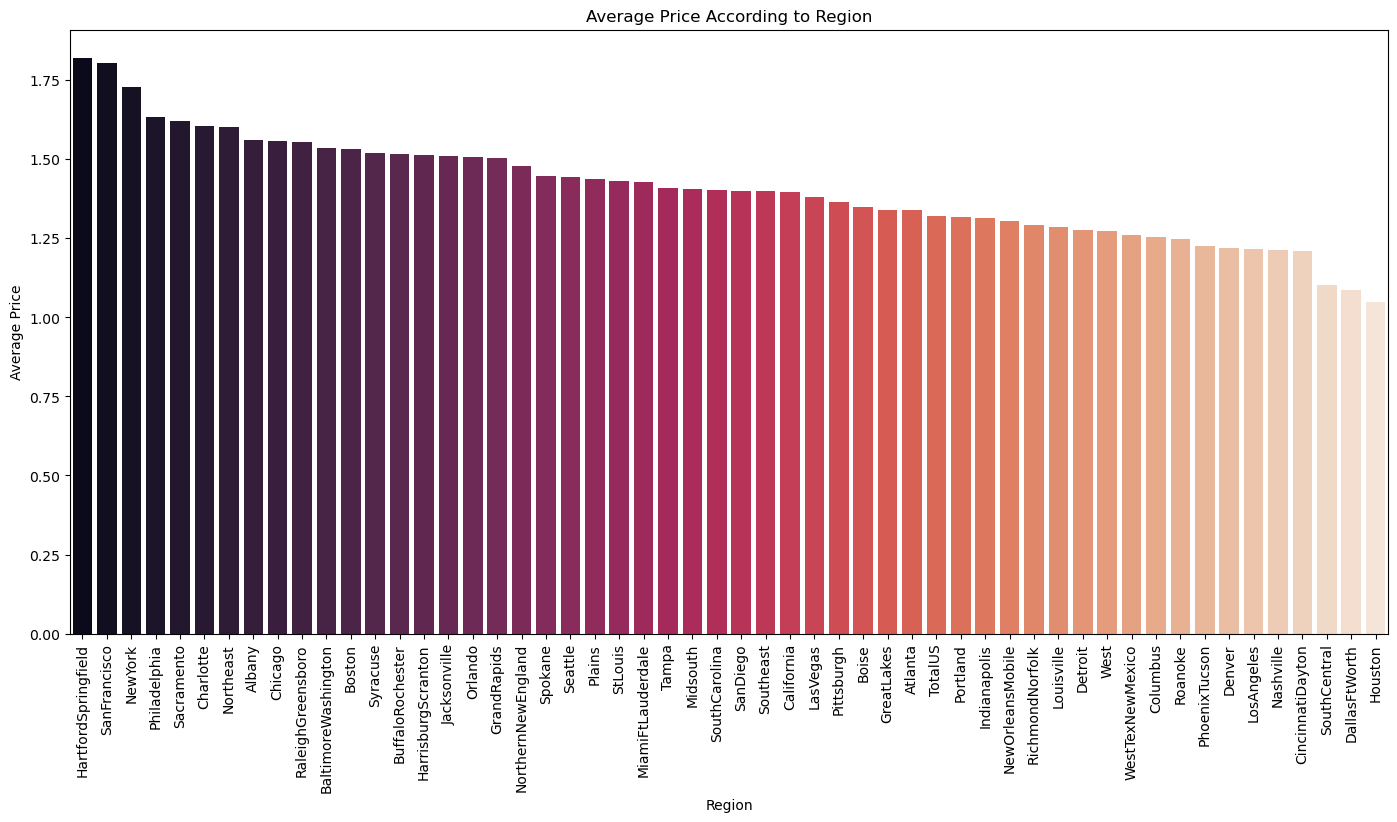

In [49]:
byRegion=df.groupby('region').mean()
byRegion.sort_values(by=['AveragePrice'], ascending=False, inplace=True)
plt.figure(figsize=(17,8),dpi=100)
sns.barplot(x = byRegion.index,y=byRegion["AveragePrice"],data = byRegion,palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price According to Region')

In [50]:
# We have plotted the bar graph here to analyze the Average Price verses the region
# It is very clear that the price of Avacado is high in the regions "HartfordSpringfield", "SanFransico" and "NewYork".

<AxesSubplot:xlabel='AveragePrice', ylabel='type'>

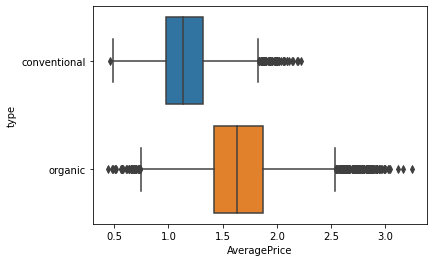

In [51]:
sns.boxplot(y="type", x="AveragePrice", data=df)

Organic avocados are more expensive when compared to conventional. This is obvious, because their cultivation is more expensive 

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

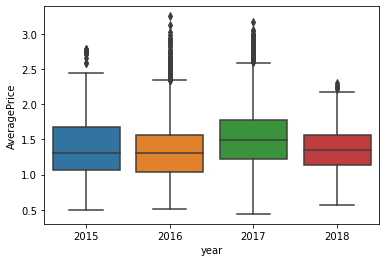

In [52]:
sns.boxplot(x="year", y="AveragePrice", data=df)

Avocados are slightly expensive in the year 2017

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

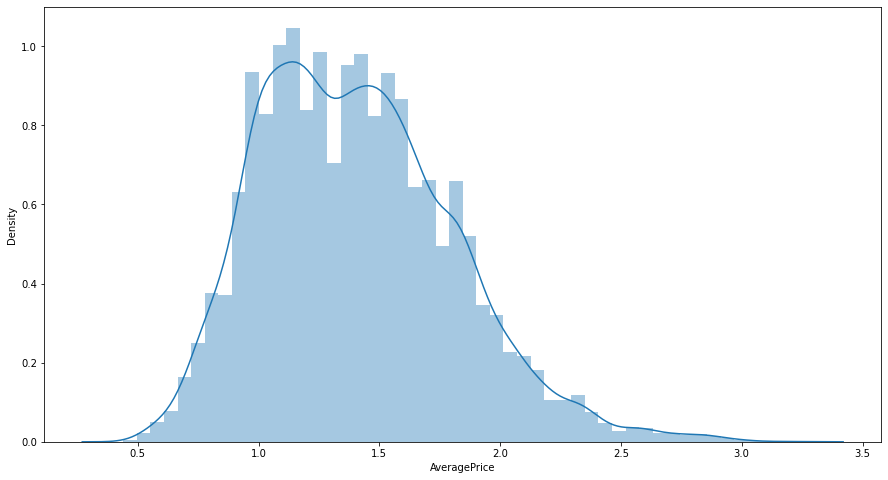

In [53]:
# Let's check the distribution of our target column Price
plt.figure(figsize=(15,8))
sns.distplot(df['AveragePrice'])

The distribution is somewhat positively skewed

Plotting histogram for uni-variant analysis and checking the Normal Distribution

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Day'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

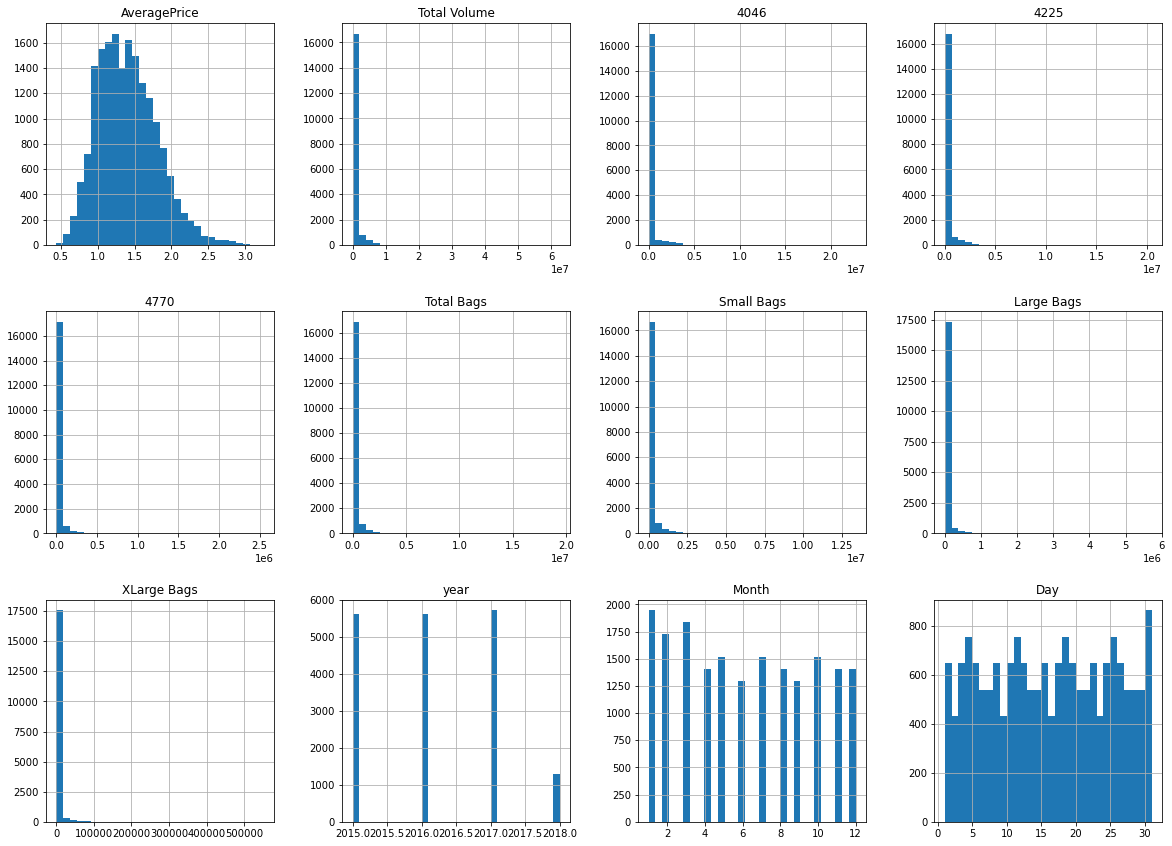

In [54]:
df.hist(figsize=(20,20), grid = True, layout = (4,4), bins=30)

Average price column is normally distributing over the histogram.

Rest of the data are not much varying in term of numbers, so they are almost left skewed data

Skewness must be treated

In [55]:
# Let's perform label encoding for columns with string values


from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
for i in ['type','region']:   
    df[i] = encoder.fit_transform(df[i]) 
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
Month             int64
Day               int64
dtype: object

In [56]:
# Now that we have converted type and region columns to integer datatype

In [57]:
df.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  year  region  Month  Day  
0     8603.62       93.25          0.0     0  2015       0     12   27  
1     9408.07       97.49          0.0     0  2015       0     12   20  
2     8042.21      103.14          0.0     0  2015       0     12   13  
3     5677.40      133.76          0.0     0  2015       0     12    6  
4     5986.26      197.69          0.0     0  2015       0     11   29

In [58]:
df['type'].unique(), df['region'].unique()

(array([0, 1]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]))

In [59]:
# "Type" and "region" are successfully converted to numeric values

# Multi - Variant Analysis

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'AveragePrice'),
  Text(0, 1.5, 'Total Volume'),
  Text(0, 2.5, '4046'),
  Text(0, 3.5, '4225'),
  Text(0, 4.5, '4770'),
  Text(0, 5.5, 'Total Bags'),
  Text(0, 6.5, 'Small Bags'),
  Text(0, 7.5, 'Large Bags'),
  Text(0, 8.5, 'XLarge Bags'),
  Text(0, 9.5, 'type'),
  Text(0, 10.5, 'year'),
  Text(0, 11.5, 'region'),
  Text(0, 12.5, 'Month'),
  Text(0, 13.5, 'Day')])

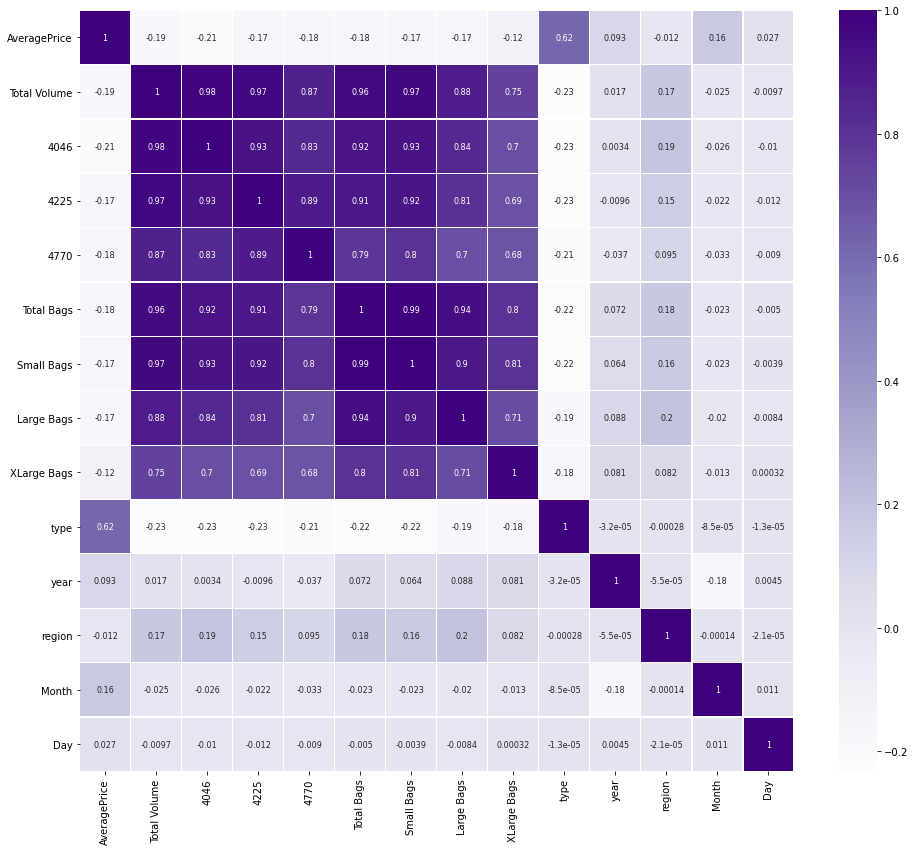

In [60]:
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(),linewidths=.2,cmap="Purples", annot=True, annot_kws={"size": 8})
plt.yticks(rotation=0)

In [61]:
# From this heatmap we have got the correlation values and we can see that the column "type" has high positive correlation 
# with the target column compared to all other columns
# So the type is a very important factor in predicting the price of an Avacado
# The column "region" has weak negative correlation value(0.012) with the target variable(not a very important factor because the 
# correlation value is close to zero)
# The other columns with negative correlation with the target variable is "TotalVolume", "4046", "4225", "4770", "Total Bags",
# "Small Bags", "LargeBags" and "XLarge Bags".


In [62]:
cor = df.corr()
cor

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192752 -0.208317 -0.172928 -0.179446   
Total Volume     -0.192752      1.000000  0.977863  0.974181  0.872202   
4046             -0.208317      0.977863  1.000000  0.926110  0.833389   
4225             -0.172928      0.974181  0.926110  1.000000  0.887855   
4770             -0.179446      0.872202  0.833389  0.887855  1.000000   
Total Bags       -0.177088      0.963047  0.920057  0.905787  0.792314   
Small Bags       -0.174730      0.967238  0.925280  0.916031  0.802733   
Large Bags       -0.172940      0.880640  0.838645  0.810015  0.698471   
XLarge Bags      -0.117592      0.747157  0.699377  0.688809  0.679861   
type              0.615845     -0.232434 -0.225819 -0.232289 -0.210027   
year              0.093197      0.017193  0.003353 -0.009559 -0.036531   
region           -0.011716      0.174176  0.192073  0.145726  0.095252   
Month             0.162409     -0.024689 -0.025803 -0.022108 -0.033424   
Day               0.027386     -0.009747 -0.010159 -0.012393 -0.009009   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.177088   -0.174730   -0.172940    -0.117592  0.615845   
Total Volume    0.963047    0.967238    0.880640     0.747157 -0.232434   
4046            0.920057    0.925280    0.838645     0.699377 -0.225819   
4225            0.905787    0.916031    0.810015     0.688809 -0.232289   
4770            0.792314    0.802733    0.698471     0.679861 -0.210027   
Total Bags      1.000000    0.994335    0.943009     0.804233 -0.217788   
Small Bags      0.994335    1.000000    0.902589     0.806845 -0.220535   
Large Bags      0.943009    0.902589    1.000000     0.710858 -0.193177   
XLarge Bags     0.804233    0.806845    0.710858     1.000000 -0.175483   
type           -0.217788   -0.220535   -0.193177    -0.175483  1.000000   
year            0.071552    0.063915    0.087891     0.081033 -0.000032   
region          0.175256    0.164702    0.198768     0.082281 -0.000280   
Month          -0.022724   -0.023126   -0.020187    -0.012969 -0.000085   
Day            -0.004988   -0.003870   -0.008352     0.000319 -0.000013   

                  year    region     Month       Day  
AveragePrice  0.093197 -0.011716  0.162409  0.027386  
Total Volume  0.017193  0.174176 -0.024689 -0.009747  
4046          0.003353  0.192073 -0.025803 -0.010159  
4225         -0.009559  0.145726 -0.022108 -0.012393  
4770         -0.036531  0.095252 -0.033424 -0.009009  
Total Bags    0.071552  0.175256 -0.022724 -0.004988  
Small Bags    0.063915  0.164702 -0.023126 -0.003870  
Large Bags    0.087891  0.198768 -0.020187 -0.008352  
XLarge Bags   0.081033  0.082281 -0.012969  0.000319  
type         -0.000032 -0.000280 -0.000085 -0.000013  
year          1.000000 -0.000055 -0.177050  0.004475  
region       -0.000055  1.000000 -0.000144 -0.000021  
Month        -0.177050 -0.000144  1.000000  0.010621  
Day           0.004475 -0.000021  0.010621  1.000000

In [63]:
# This is the correlation values for our dataset which we saw visually using the heatmap
# We can see that the column "type" has high positive correlation with our target variable i.e., AveragePrice

In [64]:
# Representing which columns have positive and negative correlations with the target column

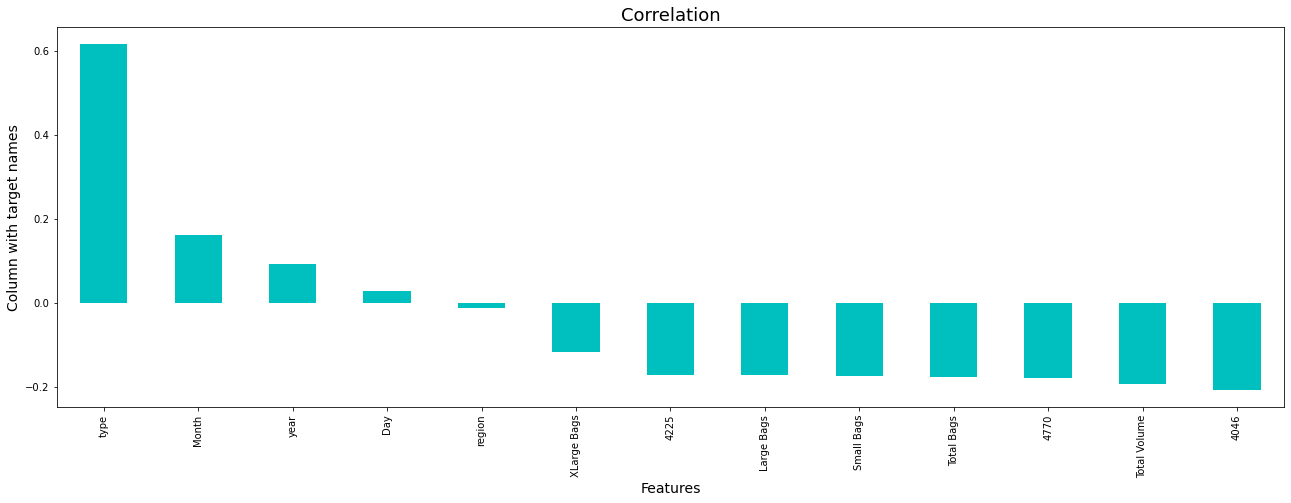

In [65]:
plt.figure(figsize=(22,7))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(["AveragePrice"]).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [66]:
# The columns with positive correlations are "type", "month", "year" and "day".
# The columns with negative correlation with the target variable is "TotalVolume", "4046", "4225", "4770", "Total Bags",
# "region", "Small Bags", "LargeBags" and "XLarge Bags".

 Checking for the presence of outliers

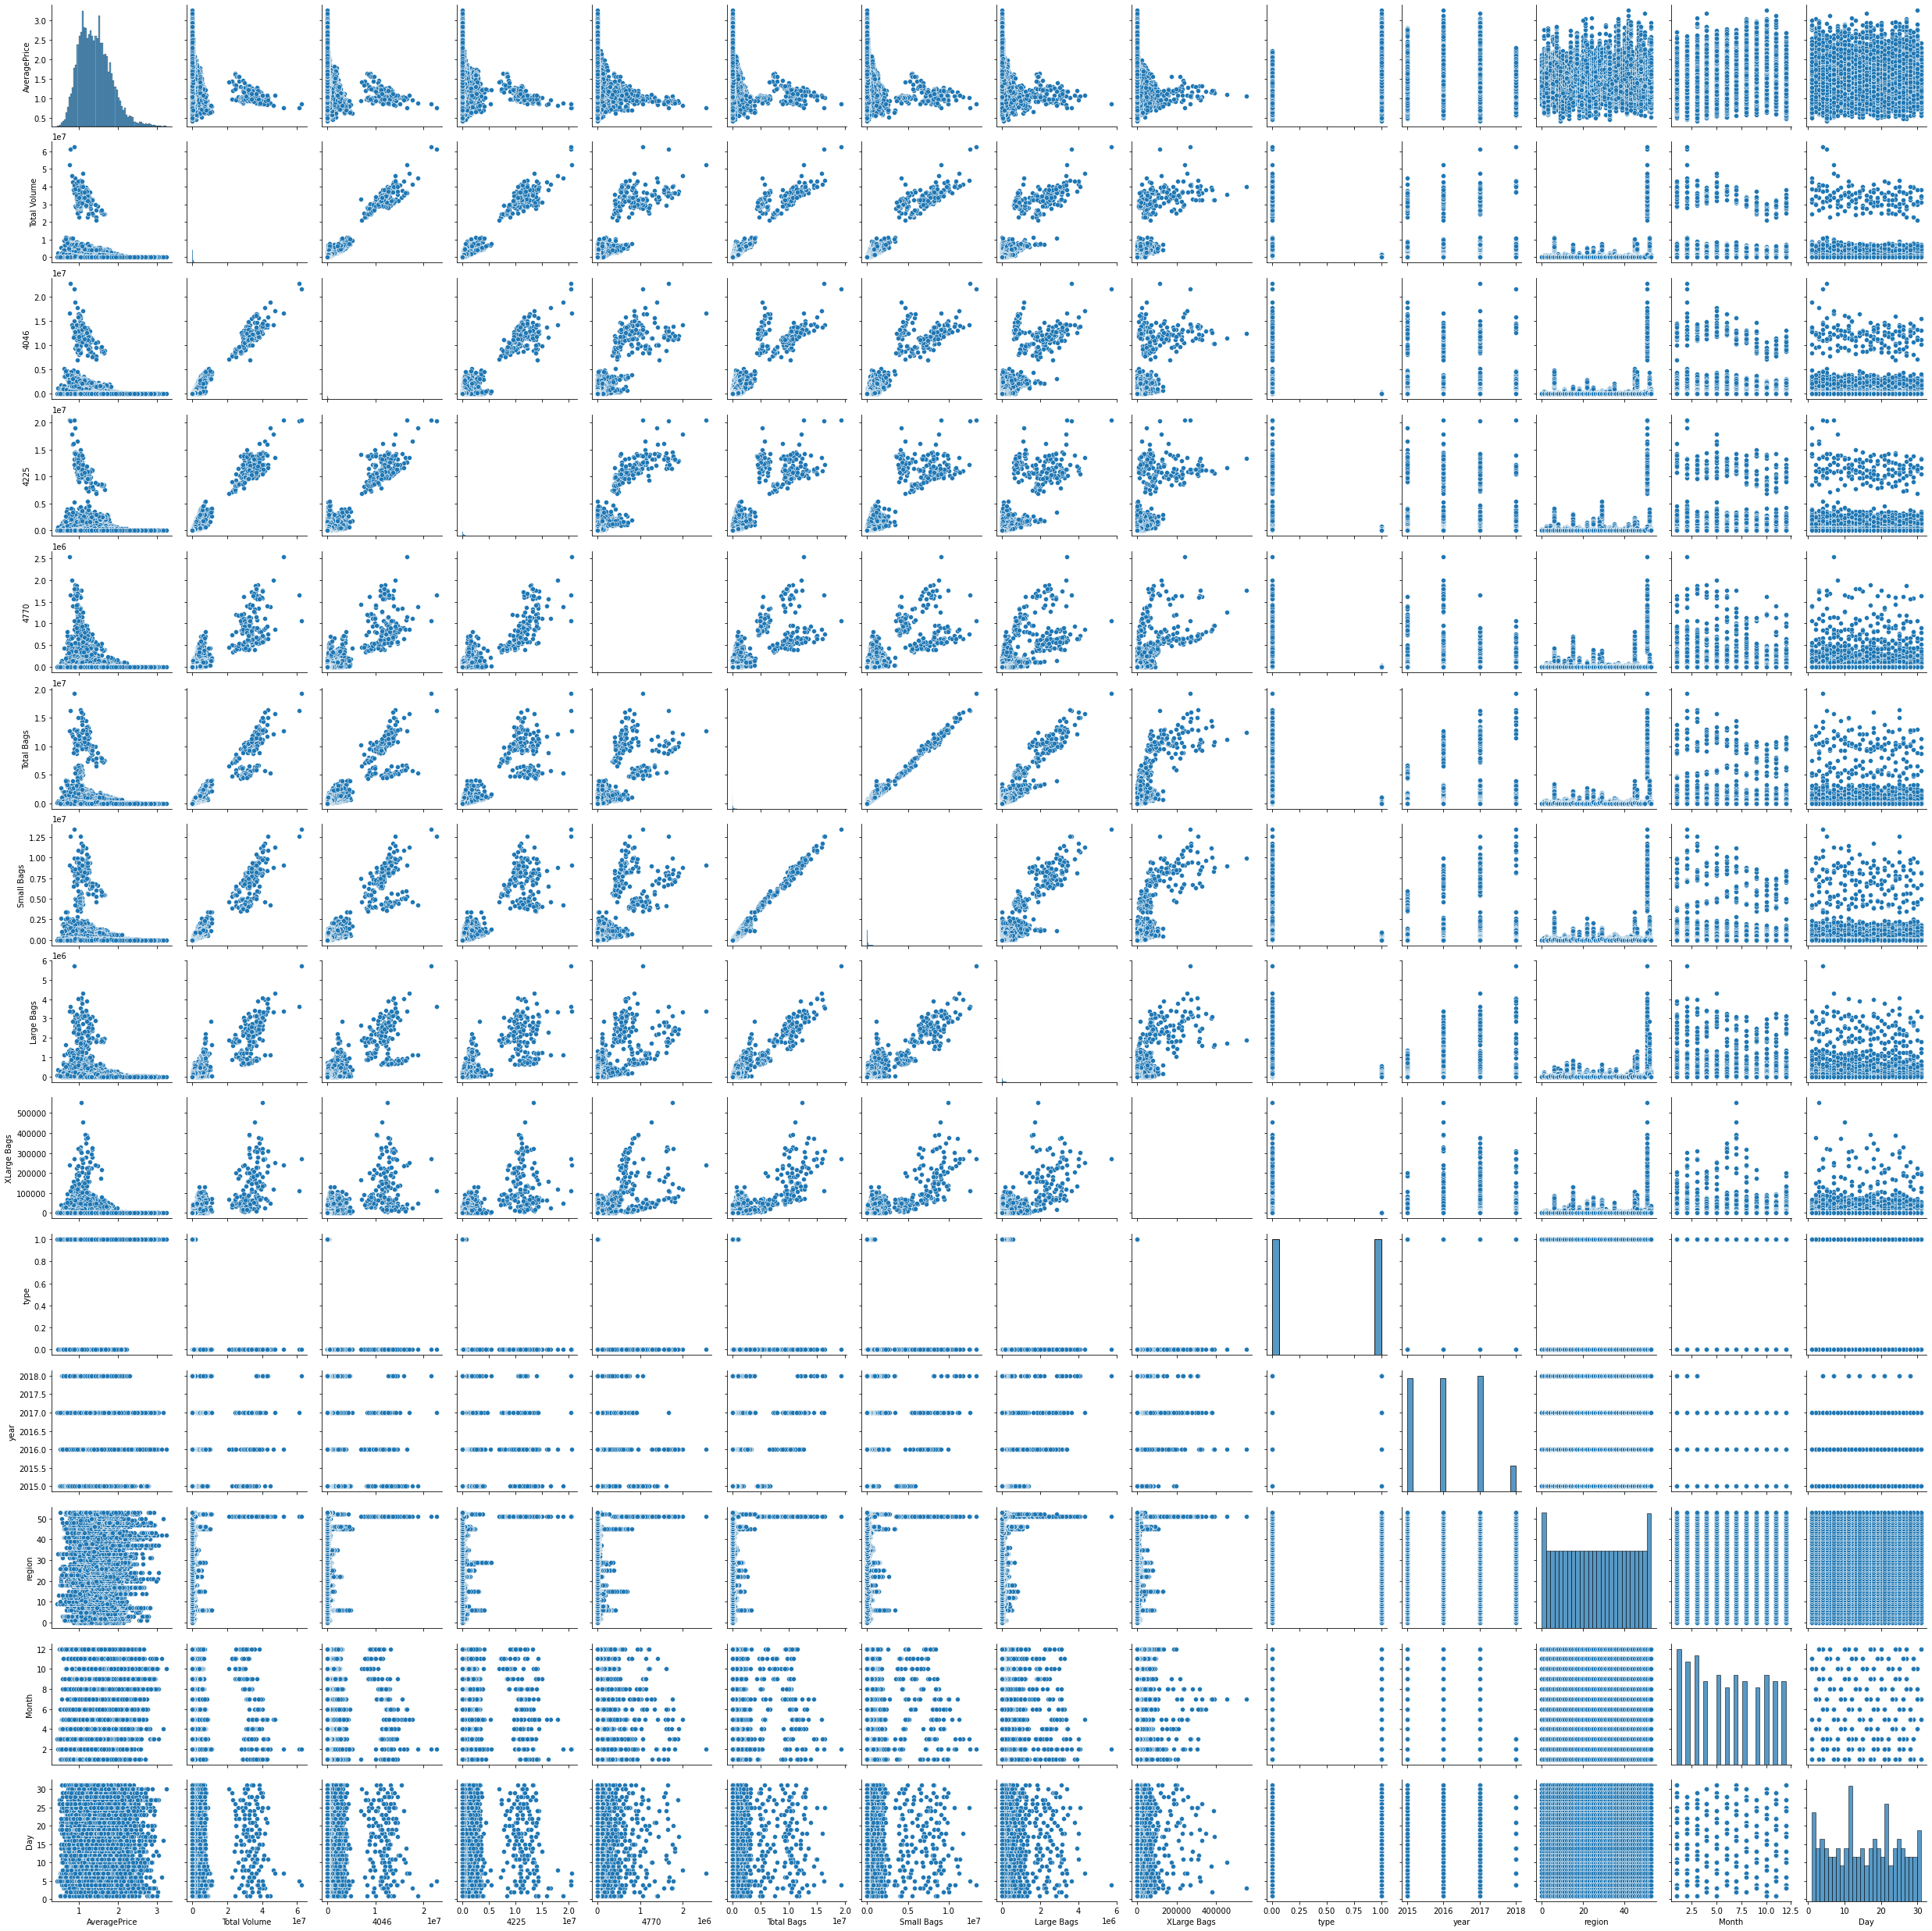

In [67]:
sns.pairplot(df)

We can see that there are few outliers in all the variables

In [68]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Month            0.106617
Day              0.014310
dtype: float64

In [69]:
#  We can see the presence of skewness in our data
# As we saw the presence of outliers and hence the skewness is present
# -(0.5) to +(0.5), the skewness within this range is acceptable
# We have skewness of many columns way outside the above mentioned range and they need to be treated. 
# Skewness is present highly.

# Considering to remove the outliers

In [70]:
# Outlier treatment using IQR

import numpy as np
from numpy import percentile

columns = df.columns
for j in columns:
    if isinstance(df[j][0], str) :
        continue
    else:
        for i in range(len(df)):
            #defining quartiles
            quartiles = percentile(df[j], [25,75])
            # calculate min/max
            lower_fence = quartiles[0] - (1.5*(quartiles[1]-quartiles[0]))
            upper_fence = quartiles[1] + (1.5*(quartiles[1]-quartiles[0]))
            if df[j][i] > upper_fence:
                df[j][i] = upper_fence
            elif df[j][i] < lower_fence:
                df[j][i] = lower_fence

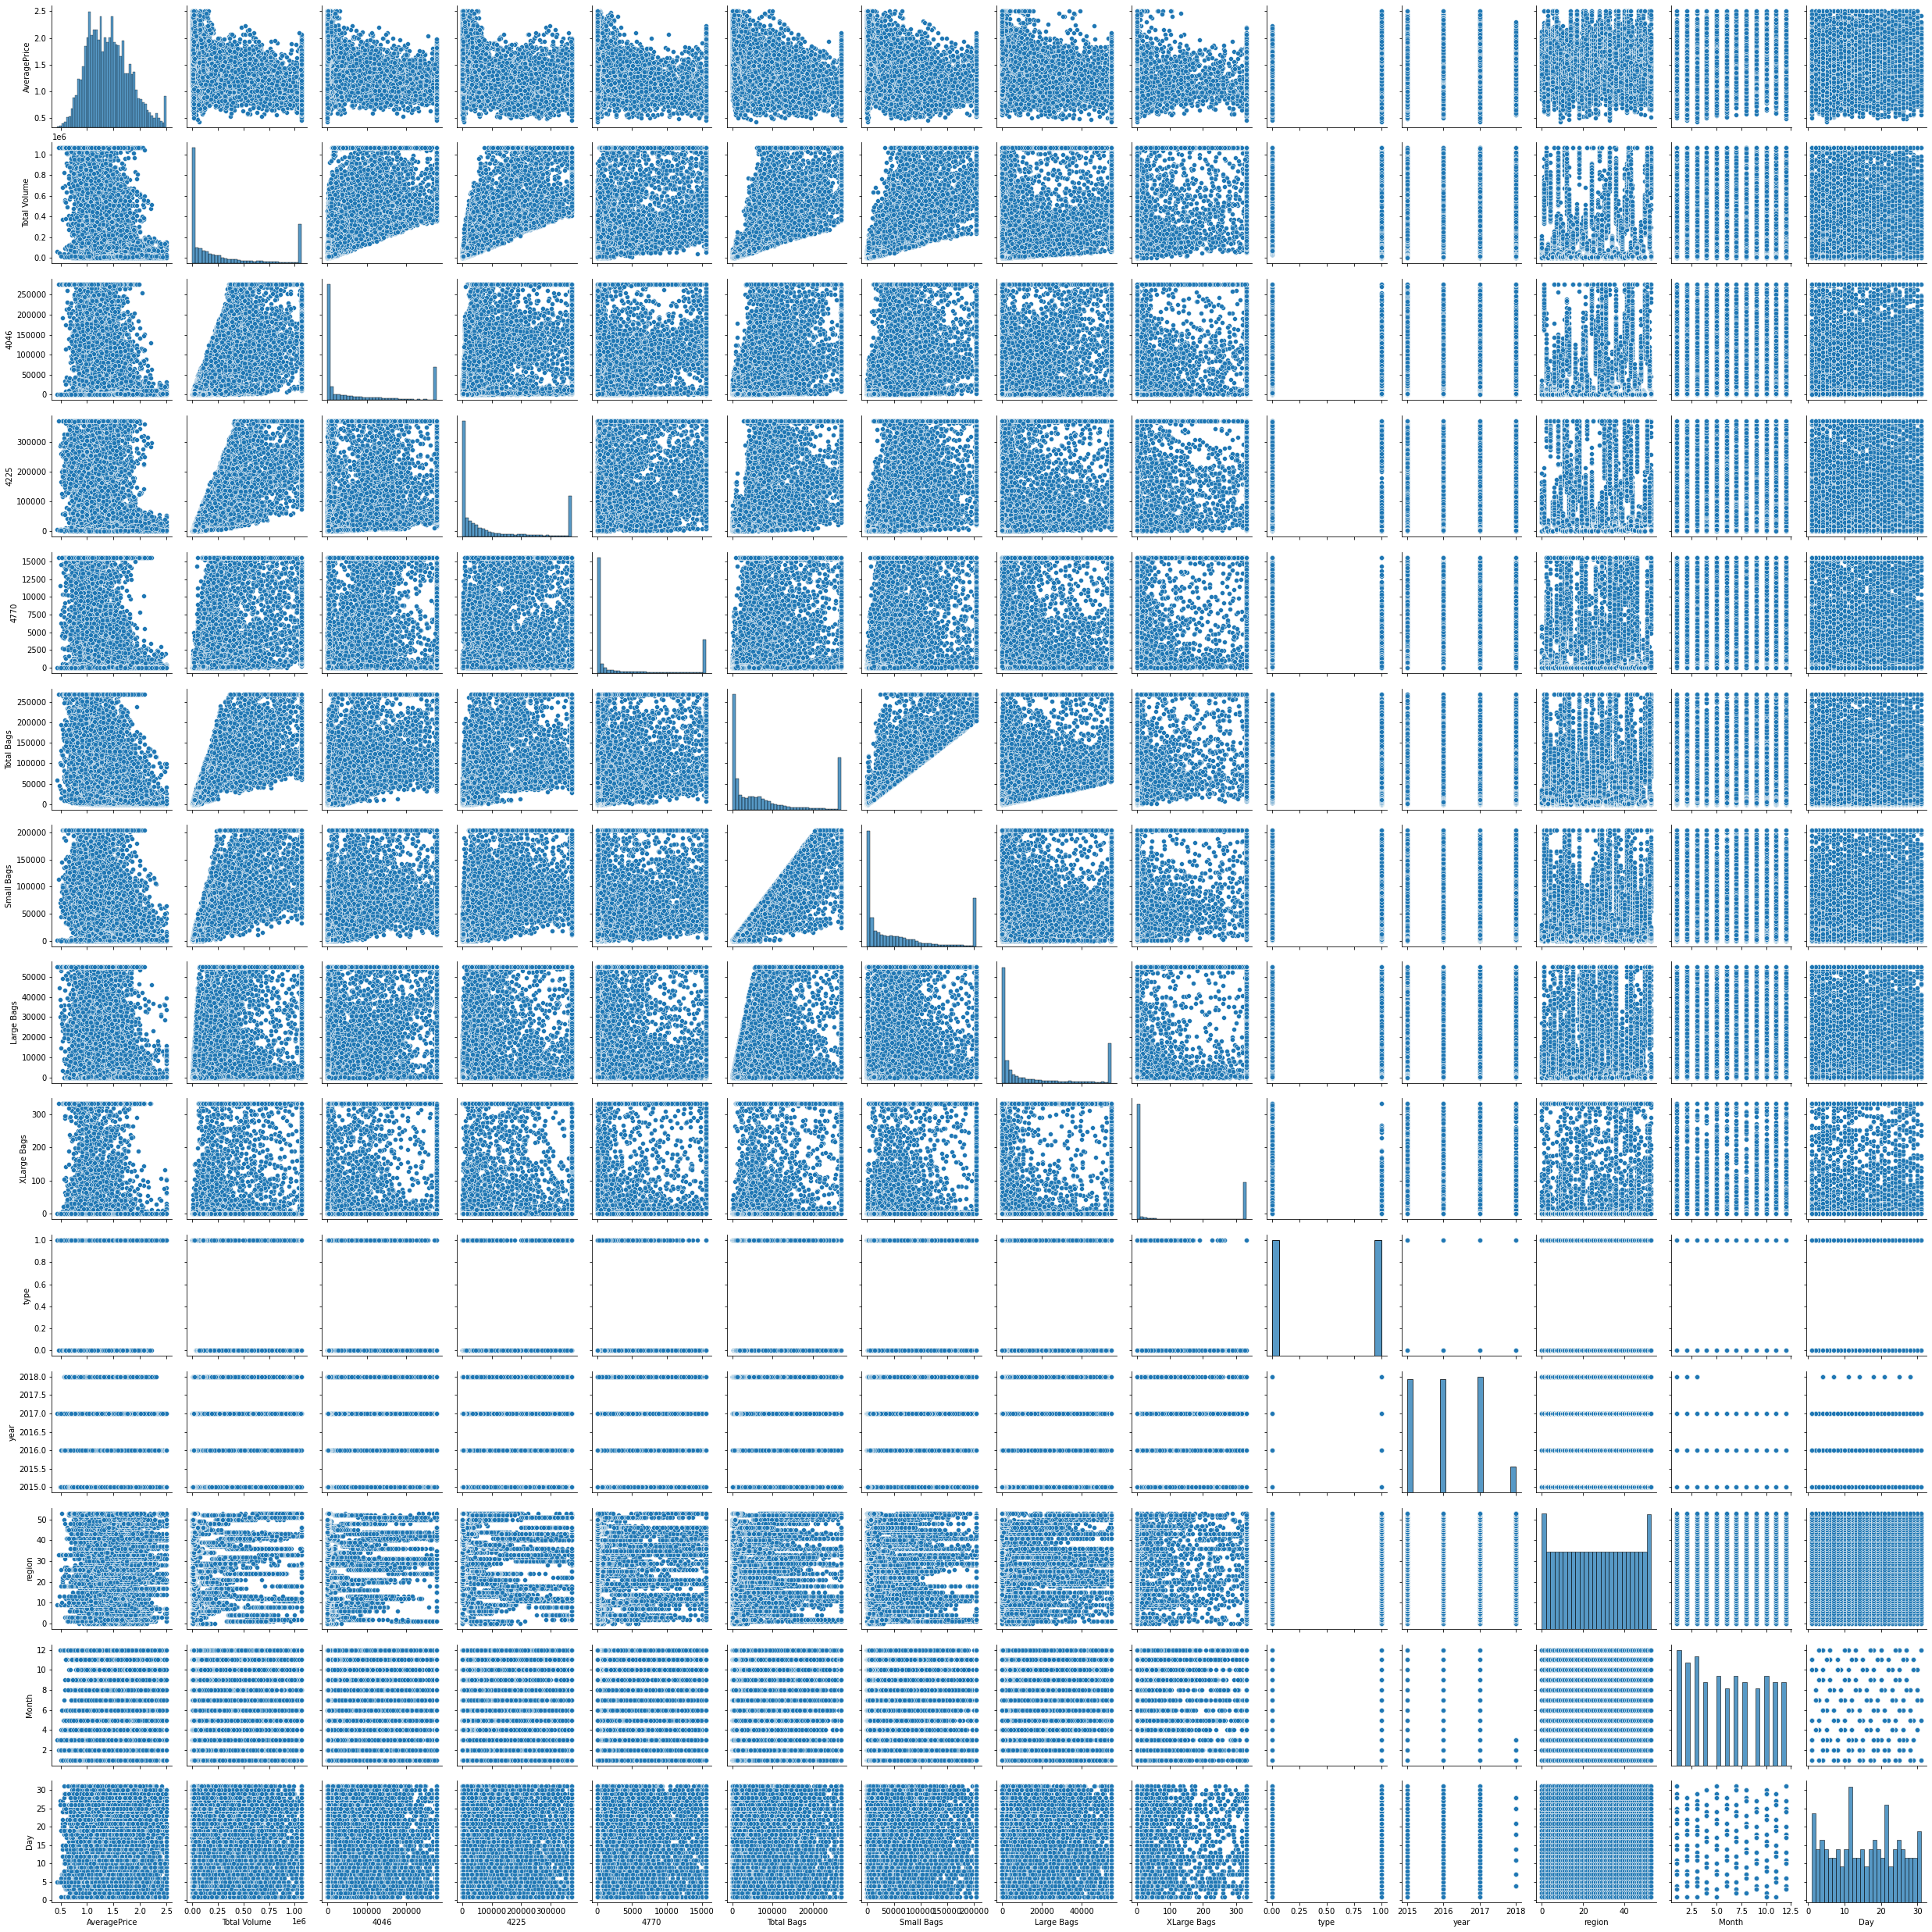

In [71]:
sns.pairplot(df)

In [72]:
# Outliers are successfully removed and hence the skewness 

In [73]:
df.skew()

AveragePrice    0.453073
Total Volume    1.206542
4046            1.251184
4225            1.219271
4770            1.212184
Total Bags      1.158550
Small Bags      1.186103
Large Bags      1.215301
XLarge Bags     1.175351
type            0.000329
year            0.215339
region          0.000030
Month           0.106617
Day             0.014310
dtype: float64

# Splitting the dataset into X features and y label

In [74]:


X = df.drop(["AveragePrice"],axis=1)
y = df["AveragePrice"]

In [75]:
X.head()

Total Volume     4046       4225    4770  Total Bags  Small Bags  \
0      64236.62  1036.74   54454.85   48.16     8696.87     8603.62   
1      54876.98   674.28   44638.81   58.33     9505.56     9408.07   
2     118220.22   794.70  109149.67  130.50     8145.35     8042.21   
3      78992.15  1132.00   71976.41   72.58     5811.16     5677.40   
4      51039.60   941.48   43838.39   75.78     6183.95     5986.26   

   Large Bags  XLarge Bags  type  year  region  Month  Day  
0       93.25          0.0     0  2015       0     12   27  
1       97.49          0.0     0  2015       0     12   20  
2      103.14          0.0     0  2015       0     12   13  
3      133.76          0.0     0  2015       0     12    6  
4      197.69          0.0     0  2015       0     11   29

In [76]:
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

# Machine Learning Models

# Hyper-parameter tuning

In [77]:
# importing all necessary models

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from math import sqrt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [78]:
# Train test split on the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# KNN

In [79]:
# Finding best parameters for the model using GridSearchCV and fitting those best parameters to our model for best performance.

k_range = list(range(1, 30))
params = dict(n_neighbors = k_range)
knn_regressor = GridSearchCV(KNeighborsRegressor(), params, cv =10, scoring = 'neg_mean_squared_error')
knn_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='neg_mean_squared_error')

In [80]:
y_train_pred =knn_regressor.predict(X_train) #Predict train result
y_test_pred =knn_regressor.predict(X_test) #Predict test result

In [81]:
print("Train Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

print("Test Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % errorr: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Train Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  0.19659767285829313
Mean absolute % error:  11
R-squared:  0.7527984618303902
Test Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  0.2384493006920074
Mean absolute % errorr:  13
R-squared:  0.6363264470294363


# Decision Tree Regressor

In [82]:
# Finding best parameters for the model using GridSearchCV and fitting those best parameters to our model for best performance.

depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [83]:
y_train_pred =tree.predict(X_train) #Predict train result
y_test_pred =tree.predict(X_test) #Predict test result

print("Train Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))


print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  0.10560873393386884
Mean absolute % error:  5
R-squared:  0.9286664076345605
Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  0.18884665494922326
Mean absolute % error:  10
R-squared:  0.7718932134801977


# Random Forest Regressor

In [84]:
# Finding best parameters for the model using GridSearchCV and fitting those best parameters to our model for best performance.


tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
random_regressor.fit(X_train, y_train)

y_train_pred = random_regressor.predict(X_train)
y_test_pred = random_regressor.predict(X_test)

print("Train Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

print("Test Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Train Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  0.048732351891835286
Mean absolute % error:  3
R-squared:  0.9848110005511047
Test Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  0.13405725074277902
Mean absolute % error:  7
R-squared:  0.8850523146540085


# Our best model in predicting the price of an Avacado is RandomForest Regressor 

# Saving the model

In [93]:
# Serializing or saving the model
# Importing the necessary library for saving the model

import joblib
joblib.dump(random_regressor,"FinalModel.pkl")

['FinalModel.pkl']

# Loading the model

In [94]:
mod=joblib.load("FinalModel.pkl")

In [95]:
print(mod.predict(X_test))

[0.75095 1.9055  1.48315 ... 1.91235 0.89675 1.8116 ]


The model is saved and loaded 

We can see the prices of an avacados for our test data when loaded